In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [2]:
from sklearn.datasets import load_wine
wine=load_wine()
x = wine.data
y =wine.target
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [3]:
data=pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
data['target']=wine['target']
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [5]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

In [6]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [7]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        14
     class 1       1.00      1.00      1.00        13
     class 2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [8]:
# import seaborn as sns
# sns.pairplot(data, hue='target')

In [9]:
from sklearn.feature_selection import SelectKBest, chi2

x_new=SelectKBest(chi2, k=2).fit_transform(x, y) 

In [10]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
x1_train

array([[  13.  ,  660.  ],
       [   5.  ,  515.  ],
       [   4.5 ,  660.  ],
       [  11.75,  620.  ],
       [   3.7 , 1020.  ],
       [   2.7 ,  312.  ],
       [   2.62,  450.  ],
       [   3.17,  750.  ],
       [   4.4 ,  550.  ],
       [   5.68, 1185.  ],
       [   3.3 ,  710.  ],
       [   2.08,  365.  ],
       [   7.6 ,  640.  ],
       [   5.6 , 1265.  ],
       [   4.6 ,  392.  ],
       [   6.38,  970.  ],
       [   4.8 , 1195.  ],
       [  10.52,  675.  ],
       [   5.7 ,  580.  ],
       [   2.94,  672.  ],
       [   3.4 ,  750.  ],
       [   4.6 ,  880.  ],
       [   2.15,  290.  ],
       [   3.8 , 1035.  ],
       [   4.9 ,  415.  ],
       [   2.9 ,  428.  ],
       [   2.85,  718.  ],
       [  10.26,  685.  ],
       [   5.  , 1280.  ],
       [   5.25, 1290.  ],
       [   3.95, 1285.  ],
       [   8.21,  855.  ],
       [   4.32,  735.  ],
       [   3.84,  990.  ],
       [   2.6 ,  937.  ],
       [   5.5 ,  510.  ],
       [   3.8 ,  428.  ],
 

In [11]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb1 = GaussianNB()

#Train the model using the training sets
gnb1.fit(x1_train, y1_train)

#Predict the response for test dataset
y1_pred = gnb1.predict(x1_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.8333333333333334


In [12]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y1_test, y1_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.93      0.93        14
     class 1       0.80      0.86      0.83        14
     class 2       0.71      0.62      0.67         8

    accuracy                           0.83        36
   macro avg       0.81      0.80      0.81        36
weighted avg       0.83      0.83      0.83        36



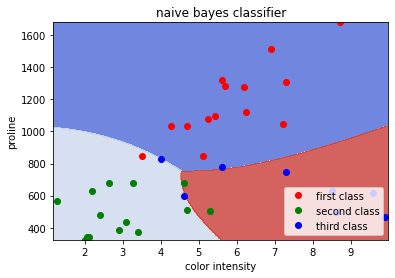

In [13]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - .1, x.max() + .1
    y_min, y_max = y.min() - .1, y.max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set-up grid for plotting.
X0, X1 = x1_test[:, 0], x1_test[:, 1]
xx, yy = make_meshgrid(X0, X1)


fig, ax = plt.subplots()

ax.plot(x1_test[y1_test==0,0], x1_test[y1_test==0,1], 'o', color='r', label='first class')
ax.plot(x1_test[y1_test==1,0], x1_test[y1_test==1,1], 'o', color='g', label='second class')
ax.plot(x1_test[y1_test==2,0], x1_test[y1_test==2,1], 'o', color='b', label='third class')

ax.set_xlabel("color intensity")
ax.set_ylabel("proline")
ax.legend(loc = 'lower right')

plot_contours(ax, gnb1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_title('naive bayes classifier')
plt.show()

Part B

In [3]:
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [4]:
data = pd.read_csv ('/content/car_evaluation.csv', header=None)
data

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
x = data.iloc[:,0:6].values
y= data.iloc[:,6].values  

x_df=pd.DataFrame(x)
y_df=pd.DataFrame(y)

#transform the data to integers
le = preprocessing.LabelEncoder() # create the object

le.fit(x_df[0]) # fit 
x_df[0]= le.transform(x_df[0]) # convert

le.fit(x_df[1]) # fit
x_df[1]= le.transform(x_df[1]) # convert

le.fit(x_df[2]) # fit
x_df[2]= le.transform(x_df[2]) # convert

le.fit(x_df[3]) # fit
x_df[3]= le.transform(x_df[3]) # convert

le.fit(x_df[4]) # fit
x_df[4]= le.transform(x_df[4]) # convert

le.fit(x_df[5]) # fit
x_df[5]= le.transform(x_df[5]) # convert

#transfrom the labels to integers
le.fit(y_df[0]) # fit
y_df[0]= le.transform(y_df[0]) # convert


In [6]:
idx = np.arange(len(x_df))
random.shuffle(idx)

x_data=x_df.values[idx]

x_tr = x_data[:1000]
x_val = x_data[1000:1300]
x_test =x_data[1300:]

y_data=y_df.values[idx]

y_tr = y_data[:1000]
y_val = y_data[1000:1300]
y_test = y_data[1300:]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

 y_acc_val: [0.62, 0.6633333333333333, 0.7066666666666667, 0.7466666666666667, 0.7233333333333334, 0.74, 0.76, 0.7766666666666666, 0.7566666666666667, 0.7666666666666667]
 y_acc_test: [0.647196261682243, 0.6728971962616822, 0.6845794392523364, 0.75, 0.7383177570093458, 0.7336448598130841, 0.7593457943925234, 0.7616822429906542, 0.7593457943925234, 0.7102803738317757]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


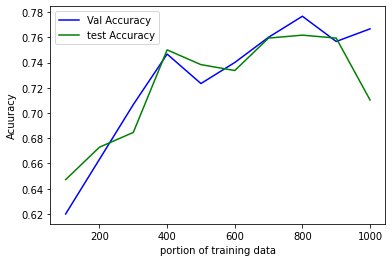

In [7]:
v=[]
t=[]
for i in (100,200,300,400,500,600,700,800,900,1000):
  x_tr=x_data[:i]
  y_tr=y_data[:i]
  #using training set 100%
  neigh = KNeighborsClassifier(n_neighbors=2)
  neigh.fit(x_tr, y_tr) 
  y_pred_val = neigh.predict(x_val)
  y_pred_test = neigh.predict(x_test)
  # Model Accuracy, how often is the classifier correct?
  y_acc_val= metrics.accuracy_score(y_val, y_pred_val)
  y_acc_test= metrics.accuracy_score(y_test, y_pred_test)
  v.append(y_acc_val)
  t.append(y_acc_test)

print(" y_acc_val:",v)
print(" y_acc_test:",t)

x = [100,200,300,400,500,600,700,800,900,1000]
plt.xlabel("portion of training data")
plt.ylabel("Acuuracy")

plt.plot(x,v,'b', label="Val Accuracy") 
plt.plot(x,t,'g', label="test Accuracy") 

plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

 y_acc_val: [0.7866666666666666, 0.7666666666666667, 0.8533333333333334, 0.86, 0.8966666666666666, 0.8833333333333333, 0.8633333333333333, 0.8433333333333334, 0.82, 0.8066666666666666]
 y_acc_test: [0.7523364485981309, 0.7102803738317757, 0.8271028037383178, 0.8504672897196262, 0.8738317757009346, 0.8878504672897196, 0.8691588785046729, 0.8551401869158879, 0.852803738317757, 0.8457943925233645]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


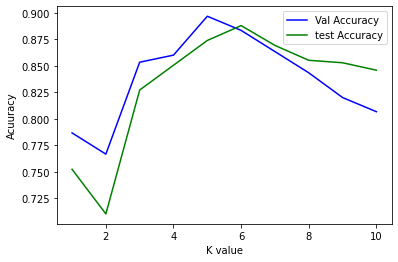

In [8]:
v1=[]
t1=[]
for i in range(1,11):
  #using training set 100%
  neigh1 = KNeighborsClassifier(n_neighbors=i)
  neigh1.fit(x_tr, y_tr) 
  y_pred_val1 = neigh1.predict(x_val)
  y_pred_test1 = neigh1.predict(x_test)
  # Model Accuracy, how often is the classifier correct?
  y_acc_val1= metrics.accuracy_score(y_val, y_pred_val1)
  y_acc_test1= metrics.accuracy_score(y_test, y_pred_test1)
  v1.append(y_acc_val1)
  t1.append(y_acc_test1)
print(" y_acc_val:",v1)
print(" y_acc_test:",t1)

plt.xlabel("K value")
plt.ylabel("Acuuracy")

x1 = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x1, v1, 'b', label="Val Accuracy")
plt.plot(x1, t1, 'g', label="test Accuracy") 

plt.legend()

In [22]:
import time
t_train=[]
t_test=[]

def KNeighbors(x,y,k):
  
    neigh = KNeighborsClassifier(n_neighbors=k)

    start1 = time.time()
    neigh.fit(x, y) 
    end1 = time.time()

    Time1=end1-start1
    t_train.append(Time1)
    print("Training time is",t_train)

    start2 = time.time()
    y_pred_test = neigh.predict(x_test)
    end2 = time.time()

    Time2=end2-start2

    
    t_test.append(Time2)

    print("Prediction time is",t)


    return(t_test,t_train)

In [29]:
KNeighbors(x_data[:100],y_data[:100],2) #10% of the whole training set and K = 2

KNeighbors(x_data[:1000],y_data[:1000],2) #100% of the whole training set and K = 2

KNeighbors(x_data[:100],y_data[:100],10) #10% of the whole training set and K = 10

t_train,t_test=KNeighbors(x_data[:1000],y_data[:1000],10) #100% of the whole training set and K = 10



Training time is [0.003154754638671875, 0.0015537738800048828, 0.0009152889251708984, 0.0015232563018798828, 0.017603158950805664, 0.01442098617553711, 0.012738943099975586, 0.021962881088256836, 0.00113677978515625]
Prediction time is [0.647196261682243, 0.6728971962616822, 0.6845794392523364, 0.75, 0.7383177570093458, 0.7336448598130841, 0.7593457943925234, 0.7616822429906542, 0.7593457943925234, 0.7102803738317757]
Training time is [0.003154754638671875, 0.0015537738800048828, 0.0009152889251708984, 0.0015232563018798828, 0.017603158950805664, 0.01442098617553711, 0.012738943099975586, 0.021962881088256836, 0.00113677978515625, 0.0016024112701416016]
Prediction time is [0.647196261682243, 0.6728971962616822, 0.6845794392523364, 0.75, 0.7383177570093458, 0.7336448598130841, 0.7593457943925234, 0.7616822429906542, 0.7593457943925234, 0.7102803738317757]
Training time is [0.003154754638671875, 0.0015537738800048828, 0.0009152889251708984, 0.0015232563018798828, 0.017603158950805664, 0.

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

No handles with labels found to put in legend.


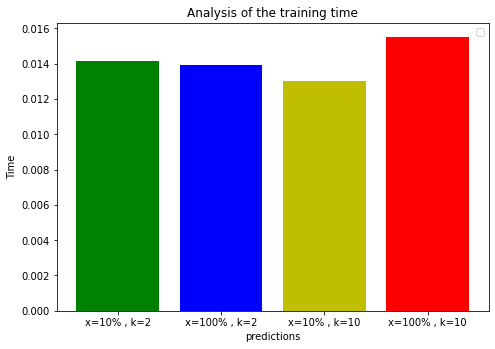

In [30]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.set_xlabel('predictions')
ax.set_ylabel('Time')
ax.set_title('Analysis of the training time')

Cases = ['x=10% , k=2', 'x=100% , k=2', 'x=10% , k=10', 'x=100% , k=10']
Training_time = t_train
ax.bar(Cases[0] ,Training_time[0] ,color = 'g')
ax.bar(Cases[1] ,Training_time[1] ,color = 'b')
ax.bar(Cases[2] ,Training_time[2] ,color = 'y')
ax.bar(Cases[3] ,Training_time[3] ,color = 'r')
plt.legend()

No handles with labels found to put in legend.


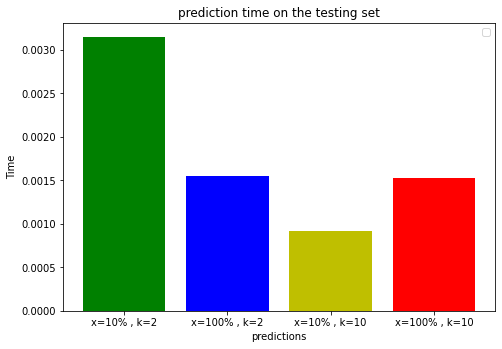

In [32]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.set_xlabel('predictions')
ax.set_ylabel('Time')
ax.set_title('prediction time on the testing set')

Cases = ['x=10% , k=2', 'x=100% , k=2', 'x=10% , k=10', 'x=100% , k=10']
prediction_time = t_test
ax.bar(Cases[0] ,prediction_time[0] ,color = 'g')
ax.bar(Cases[1] ,prediction_time[1] ,color = 'b')
ax.bar(Cases[2] ,prediction_time[2] ,color = 'y')
ax.bar(Cases[3] ,prediction_time[3] ,color = 'r')
plt.legend()